<a href="https://colab.research.google.com/github/ericosta-dev/ws_steam/blob/master/AnaliseExploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from wordcloud import WordCloud, STOPWORDS

In [6]:
cd ../

/


In [8]:
df = pd.read_csv('jogos_desconto.csv',encoding='latin1')

In [17]:
df.head()

,nomes,categorias,perc_desc,val_original,val_desconto
0,Timberborn,"Acesso Antecipado, Gestão de Cidades, Simulado...",-20%,$24.99,$19.99
1,Supraland Six Inches Under,"Quebra-Cabeças, Exploração, Metroidvania, Tiro...",-15%,$19.99,$16.99
2,NBA 2K22,"Desporto, Basquetebol, Simulação, eSports",-60%,$59.99,$23.99
3,Draconia,"RPG, Simulação, Indie, Dragões",-10%,$34.99,$31.49
4,The Anacrusis,"Acesso Antecipado, Tiros em Primeira Pessoa, J...",-20%,$29.99,$23.99


Tratando as colunas, retirando caracteres especiais.

In [20]:
df['perc_desc'] = df['perc_desc'].map(lambda x: x.lstrip('-').rstrip('%'))
df['val_original'] = df['val_original'].map(lambda x: x.lstrip('$'))
df['val_desconto'] = df['val_desconto'].map(lambda x: x.lstrip('$'))

In [23]:
df.head()

,nomes,categorias,perc_desc,val_original,val_desconto
0,Timberborn,"Acesso Antecipado, Gestão de Cidades, Simulado...",20,24.99,19.99
1,Supraland Six Inches Under,"Quebra-Cabeças, Exploração, Metroidvania, Tiro...",15,19.99,16.99
2,NBA 2K22,"Desporto, Basquetebol, Simulação, eSports",60,59.99,23.99
3,Draconia,"RPG, Simulação, Indie, Dragões",10,34.99,31.49
4,The Anacrusis,"Acesso Antecipado, Tiros em Primeira Pessoa, J...",20,29.99,23.99


Nuvem de Palavras - Categorias

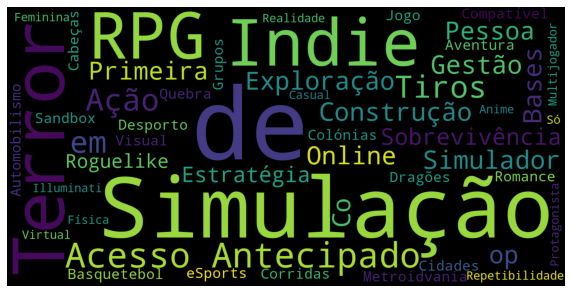

In [25]:
categorias = df['categorias']
nuvemPalavras = ' '.join(categorias)

wordcloudTemas = WordCloud(background_color="black", width=1600, height=800).generate(nuvemPalavras
                                                                                        )

fig, ax = plt.subplots(figsize=(10,6))
ax.set_axis_off()
plt.imshow(wordcloudTemas);

Nuvem de Palavras - Percentual Desconto

In [34]:
df['perc_desc'] = df['perc_desc'].astype('str') 
df.dtypes

nomes           object
categorias      object
perc_desc       object
val_original    object
val_desconto    object
dtype: object

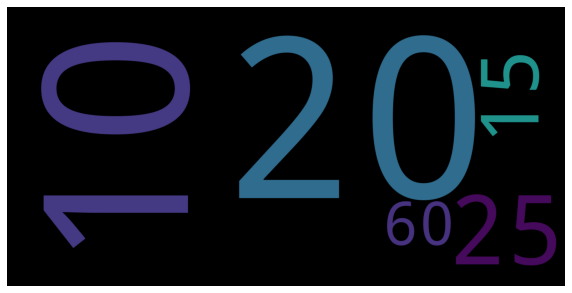

In [38]:
desconto = df['perc_desc'].value_counts()
desconto.index = desconto.index.map(str)

wordcloudDesc = WordCloud(background_color="black", width=1600, height=800).generate_from_frequencies(desconto)

fig, ax = plt.subplots(figsize=(10,6))
ax.set_axis_off()
plt.imshow(wordcloudDesc);

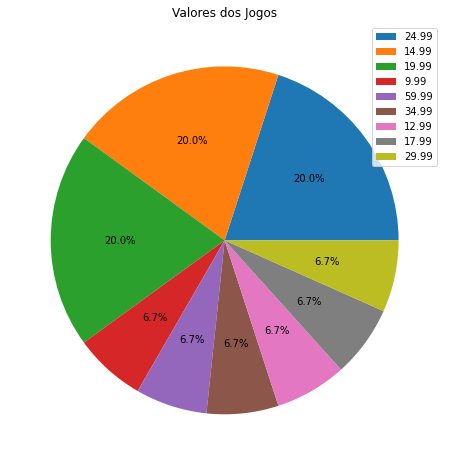

In [45]:
dados = df['val_original'].value_counts()
legenda = dados.index

fig, ax = plt.subplots(figsize = (8,8)) 
ax = plt.pie(dados, autopct='%1.1f%%')
plt.title('Valores dos Jogos')
plt.legend(legenda,loc= 'upper right')
plt.show()

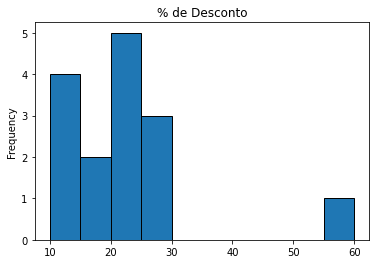

In [49]:
df['perc_desc'] = df['perc_desc'].astype(float)
df['perc_desc'].plot.hist(title='% de Desconto', edgecolor='black', bins = 10)

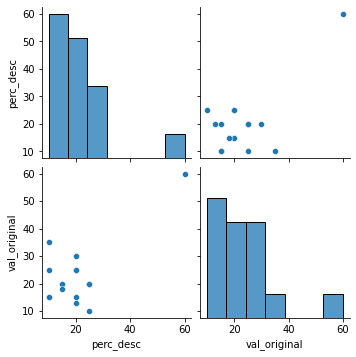

In [52]:
sb.pairplot(data=df[['perc_desc', 'val_original','val_desconto']])